In [19]:
import random

# Read the words from the file
with open('overlapping_vocab.txt', 'r', encoding='utf-8') as file:
    words = file.read().splitlines()

# Randomly select 10 words
random_words = random.sample(words, 20)
print(random_words)

['rest', 'كما', 'شهر', 'never', 'dark', 'الغردقة', 'الشغل', 'طلعنا', 'أننا', 'teams', 'الطفل', 'هيعمل', 'points', 'spain', 'بتفكر', 'وبعدين', 'بنزل', 'اللغات', 'الطبيعي', 'عايزه']


In [20]:
from gensim.models import Word2Vec

models = ["artificial_cbow.model", "natural_cbow.model", "artificial_sg.model", "natural_sg.model"]

def jaccard_similarity(list1, list2): 
    set1 = set(list1) 
    set2 = set(list2) 
    intersection = len(set1.intersection(set2)) 
    union = len(set1.union(set2)) 
    return intersection / union if union != 0 else 0

natural_jaccards = []
artificial_jaccards = []
cbow_jaccards = []
sg_jaccards = []

with open('random_results.txt', 'w', encoding='utf-8') as file:
    for word in random_words:
        artificial_cbow = []
        natural_cbow = []
        artificial_sg = []
        natural_sg = []
        for model_name in models:
            model = Word2Vec.load(model_name)
            file.write(f"Model: {model_name}\n")
            similar_words = model.wv.most_similar(word, topn=50)

            file.write(f"Similar words to '{word}':\n")
            count = 0
            for similar_word, similarity in similar_words:
                if word not in words:
                    continue
                file.write(f"{similar_word}: {similarity}\n")
                count += 1
                if model_name == "artificial_cbow.model":
                    artificial_cbow.append(similar_word)
                elif model_name == "natural_cbow.model":
                    natural_cbow.append(similar_word)
                elif model_name == "artificial_sg.model":
                    artificial_sg.append(similar_word)
                elif model_name == "natural_sg.model":
                    natural_sg.append(similar_word)
                if count == 10:
                    break
            file.write("\n")
        jaccard_cbow = jaccard_similarity(artificial_cbow, natural_cbow) 
        jaccard_sg = jaccard_similarity(artificial_sg, natural_sg) 
        jaccard_natural = jaccard_similarity(natural_cbow, natural_sg)
        jaccard_artificial = jaccard_similarity(artificial_cbow, artificial_sg)
        file.write(f"Jaccard Similarity for CBOW: {jaccard_cbow}\n") 
        file.write(f"Jaccard Similarity for Skip-gram: {jaccard_sg}\n")
        file.write(f"Jaccard Similarity for Natural: {jaccard_natural}\n")
        file.write(f"Jaccard Similarity for Artificial: {jaccard_artificial}\n")
        file.write("\n\n")
        natural_jaccards.append(jaccard_natural)
        artificial_jaccards.append(jaccard_artificial)
        cbow_jaccards.append(jaccard_cbow)
        sg_jaccards.append(jaccard_sg)

print(f"Average Jaccard Similarity for Natural: {sum(natural_jaccards) / len(natural_jaccards)}")
print(f"Average Jaccard Similarity for Artificial: {sum(artificial_jaccards) / len(artificial_jaccards)}")
print(f"Average Jaccard Similarity for CBOW: {sum(cbow_jaccards) / len(cbow_jaccards)}")
print(f"Average Jaccard Similarity for Skip-gram: {sum(sg_jaccards) / len(sg_jaccards)}")


Average Jaccard Similarity for Natural: 0.21074315691188755
Average Jaccard Similarity for Artificial: 0.18878545345263611
Average Jaccard Similarity for CBOW: 0.007894736842105263
Average Jaccard Similarity for Skip-gram: 0.005263157894736842


In [21]:
import itertools
from tqdm import tqdm

# Randomly sample 5 pairs of words
word_pairs = random.sample(list(itertools.combinations(words, 2)), 200)

natural_cbow = []
natural_sg = []
artificial_cbow = []
artificial_sg = []

real_models = []

for model_name in models:
    model = Word2Vec.load(model_name)
    real_models.append(model)

# Calculate distances for each model
with open('pairwise_similarity.txt', 'w', encoding='utf-8') as file:
    for word1, word2 in tqdm(word_pairs):
        file.write(f"Word Pair: ({word1}, {word2})\n")
        for model_name, model in zip(models, real_models):
            model = Word2Vec.load(model_name)
            similarity = model.wv.similarity(word1, word2)
            file.write(f"Model: {model_name}, Similarity: {similarity}\n")
            if "natural" in model_name:
                if "cbow" in model_name:
                    natural_cbow.append(similarity)
                else:
                    natural_sg.append(similarity)
            else:
                if "cbow" in model_name:
                    artificial_cbow.append(similarity)
                else:
                    artificial_sg.append(similarity)
        file.write("\n")

100%|██████████| 200/200 [00:32<00:00,  6.15it/s]


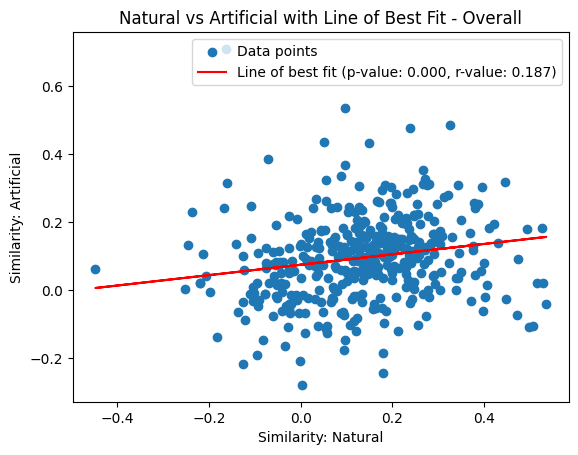

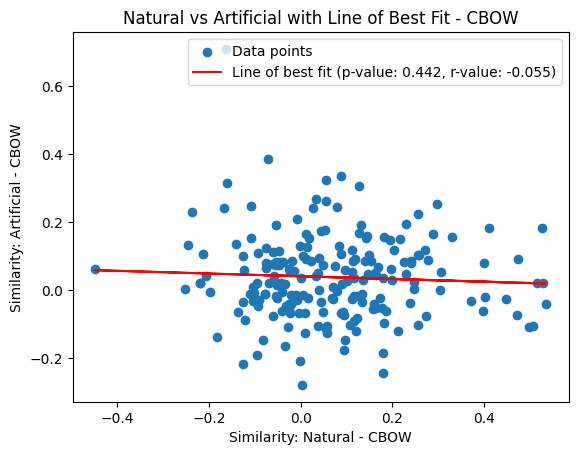

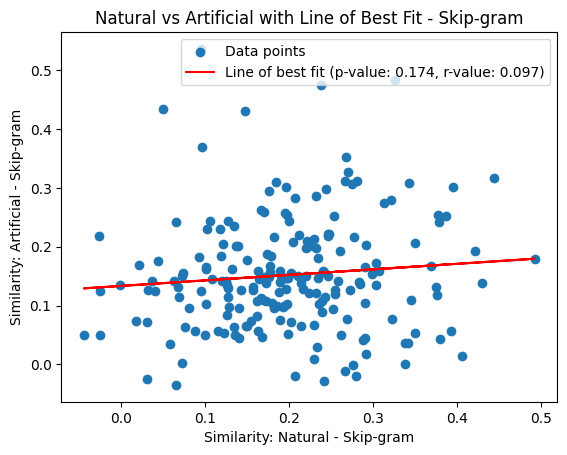

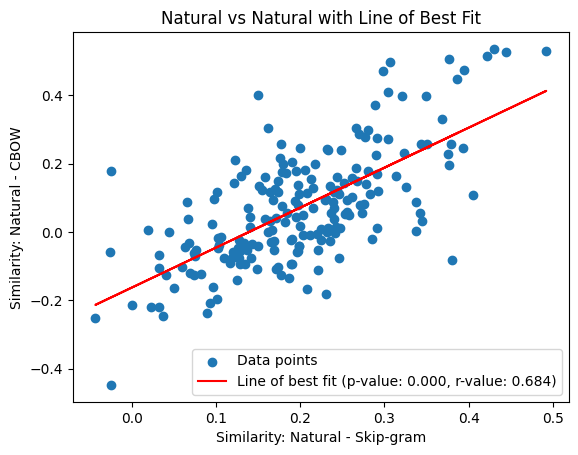

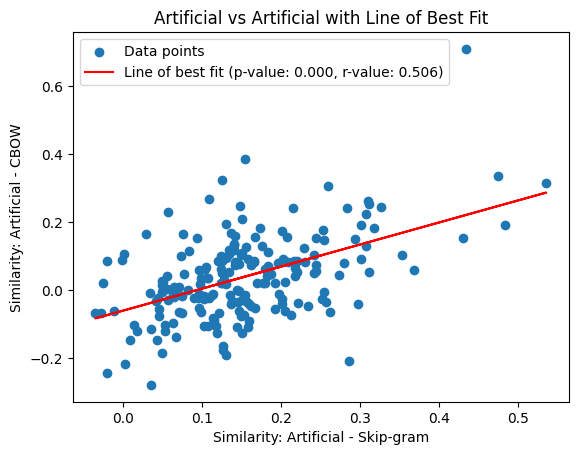

In [29]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

natural = natural_cbow + natural_sg
artificial = artificial_cbow + artificial_sg

# Scatter plot
plt.scatter(natural, artificial, label='Data points')

# Line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(natural, artificial)
line = slope * np.array(natural) + intercept
plt.plot(natural, line, color='red', label=f'Line of best fit (p-value: {p_value:.3f}, r-value: {r_value:.3f})')

plt.xlabel('Similarity: Natural')
plt.ylabel('Similarity: Artificial')
plt.title('Natural vs Artificial with Line of Best Fit - Overall')
plt.legend()

plt.show()

# Scatter plot
plt.scatter(natural_cbow, artificial_cbow, label='Data points')

# Line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(natural_cbow, artificial_cbow)
line = slope * np.array(natural_cbow) + intercept
plt.plot(natural_cbow, line, color='red', label=f'Line of best fit (p-value: {p_value:.3f}, r-value: {r_value:.3f})')

plt.xlabel('Similarity: Natural - CBOW')
plt.ylabel('Similarity: Artificial - CBOW')
plt.title('Natural vs Artificial with Line of Best Fit - CBOW')
plt.legend()

plt.show()

# Scatter plot
plt.scatter(natural_sg, artificial_sg, label='Data points')

# Line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(natural_sg, artificial_sg)
line = slope * np.array(natural_sg) + intercept
plt.plot(natural_sg, line, color='red', label=f'Line of best fit (p-value: {p_value:.3f}, r-value: {r_value:.3f})')

plt.xlabel('Similarity: Natural - Skip-gram')
plt.ylabel('Similarity: Artificial - Skip-gram')
plt.title('Natural vs Artificial with Line of Best Fit - Skip-gram')
plt.legend()

plt.show()

# Scatter plot
plt.scatter(natural_sg, natural_cbow, label='Data points')

# Line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(natural_sg, natural_cbow)
line = slope * np.array(natural_sg) + intercept
plt.plot(natural_sg, line, color='red', label=f'Line of best fit (p-value: {p_value:.3f}, r-value: {r_value:.3f})')

plt.xlabel('Similarity: Natural - Skip-gram')
plt.ylabel('Similarity: Natural - CBOW')
plt.title('Natural vs Natural with Line of Best Fit')
plt.legend()

plt.show()

# Scatter plot
plt.scatter(artificial_sg, artificial_cbow, label='Data points')

# Line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(artificial_sg, artificial_cbow)
line = slope * np.array(artificial_sg) + intercept
plt.plot(artificial_sg, line, color='red', label=f'Line of best fit (p-value: {p_value:.3f}, r-value: {r_value:.3f})')

plt.xlabel('Similarity: Artificial - Skip-gram')
plt.ylabel('Similarity: Artificial - CBOW')
plt.title('Artificial vs Artificial with Line of Best Fit')
plt.legend()

plt.show()